# EDA + Data Preprocessing: SMS Spam Collection

Cel:
- pobrać dane
- zrobić podstawowe EDA
- zapisać wersję przetworzoną do `data/processed/`

In [115]:
#libraries
from pathlib import Path
import re
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_STATE = 42

In [116]:
REPO_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATA_RAW = REPO_ROOT / "data" / "raw"
DATA_SAMPLE = REPO_ROOT / "data" / "sample"
DATA_PROCESSED = REPO_ROOT / "data" / "processed"

DATA_RAW.mkdir(parents=True, exist_ok=True)
DATA_SAMPLE.mkdir(parents=True, exist_ok=True)
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

REPO_ROOT, DATA_RAW, DATA_SAMPLE, DATA_PROCESSED

(PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski'),
 PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/data/raw'),
 PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/data/sample'),
 PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/data/processed'))

In [117]:
import zipfile
import urllib.request

UCI_ZIP_URL = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = DATA_RAW / "sms_spam_collection.zip"
extract_dir = DATA_RAW / "sms_spam_collection"

if not zip_path.exists():
    print("Downloading dataset...")
    urllib.request.urlretrieve(UCI_ZIP_URL, zip_path)
else:
    print("ZIP already downloaded.")

if not extract_dir.exists():
    print("Extracting dataset...")
    extract_dir.mkdir(parents=True, exist_ok=True)
    with zipfile.ZipFile(zip_path, "r") as zf:
        zf.extractall(extract_dir)
else:
    print("Dataset already extracted.")

list(extract_dir.iterdir())

ZIP already downloaded.
Dataset already extracted.


[PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/data/raw/sms_spam_collection/readme'),
 PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/data/raw/sms_spam_collection/SMSSpamCollection')]

In [118]:
data_file = extract_dir / "SMSSpamCollection"
assert data_file.exists(), f"Nie znaleziono pliku: {data_file}"

df = pd.read_csv(
    data_file,
    sep="\t",
    header=None,
    names=["label", "text"],
    encoding="utf-8"
)

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
sample_df = df.sample(500)
sample_df.to_csv(DATA_SAMPLE / "sample500.csv")

In [120]:
print("Shape:", df.shape)
print(df["label"].value_counts())
print("\nMissing values:\n", df.isna().sum())

# Zamiana label na 0/1
df["label_bin"] = (df["label"].str.lower() == "spam").astype(int)
df[["label", "label_bin"]].head()

Shape: (5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64

Missing values:
 label    0
text     0
dtype: int64


,label,label_bin
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


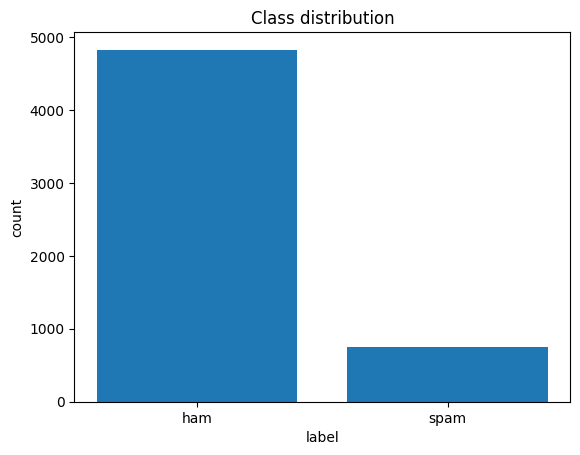

In [121]:
counts = df["label"].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Class distribution")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

# Wniosek
Mamy dysproporcję klas -> można rozważyć standaryzację np. downsampling

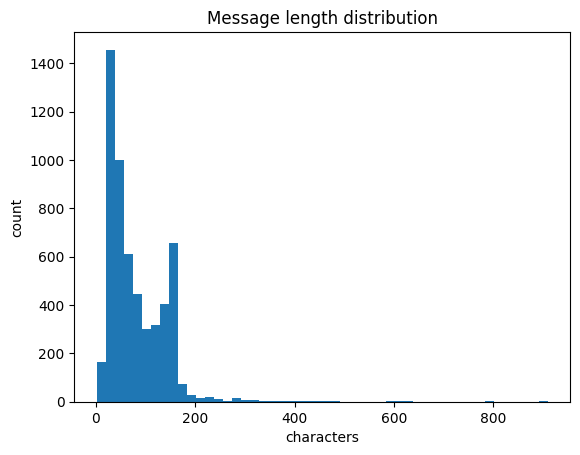

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


In [122]:
df["text_len"] = df["text"].astype(str).str.len()

plt.figure()
plt.hist(df["text_len"], bins=50)
plt.title("Message length distribution")
plt.xlabel("characters")
plt.ylabel("count")
plt.show()

df.groupby("label")["text_len"].describe()

<Figure size 800x400 with 0 Axes>

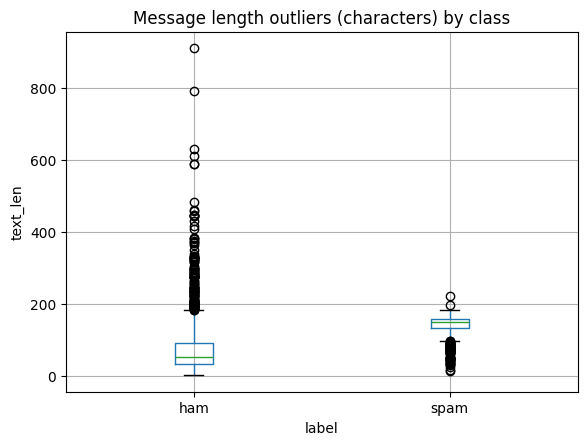

In [123]:
plt.figure(figsize=(8,4))
df.boxplot(column="text_len", by="label")
plt.title("Message length outliers (characters) by class")
plt.suptitle("")
plt.xlabel("label")
plt.ylabel("text_len")
plt.show()

Zidentyfikowane outliery nie zostały usunięte, ponieważ reprezentują realne przypadki (np. rozbudowane wiadomości spamowe). W projekcie kluczowa jest wykrywalność spamu, więc eliminowanie dłuższych wiadomości mogłoby prowadzić do utraty ważnych przykładów.

In [124]:
def show_examples(label: str, n: int = 3):
    sample = df[df["label"] == label].sample(n=min(n, (df["label"] == label).sum()), random_state=RANDOM_STATE)
    for i, txt in enumerate(sample["text"].tolist(), 1):
        print(f"[{label.upper()} #{i}] {txt}\n")

show_examples("ham", 3)
show_examples("spam", 3)

[HAM #1] If i not meeting ü all rite then i'll go home lor. If ü dun feel like comin it's ok.

[HAM #2] I.ll always be there, even if its just in spirit. I.ll get a bb soon. Just trying to be sure i need it.

[HAM #3] Sorry that took so long, omw now

[SPAM #1] Summers finally here! Fancy a chat or flirt with sexy singles in yr area? To get MATCHED up just reply SUMMER now. Free 2 Join. OptOut txt STOP Help08714742804

[SPAM #2] This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08718726970 NOW! Only 10p per min. BT-national-rate 

[SPAM #3] Get ur 1st RINGTONE FREE NOW! Reply to this msg with TONE. Gr8 TOP 20 tones to your phone every week just £1.50 per wk 2 opt out send STOP 08452810071 16



In [125]:
#!python3 -m spacy download en_core_web_md

In [126]:
#nlp = spacy.load('en_core_web_md', disable=['ner', 'parser'])

In [127]:
#"go".lower() in nlp.Defaults.stop_words

In [128]:
def basic_clean(text: str) -> str:
    text = str(text).lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text
    #return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))
    return text

df["text_clean"] = df["text"].apply(basic_clean)
df[["text", "text_clean"]].head()

,text,text_clean
0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


# Uwaga
Usunięcie "stop_words" ma negatywny efekt na późniejsze wyniki modelu (accuracy, macro F1), więc zdecydowałem się nie wykorzysywać tej funkcjonalności w tym konkretnym problemie. 

# Wniosek 
Występowanie "stop_word" w przypadku klasyfikacji spamu, jest instotnym czynnikiem

In [129]:
out_path = DATA_PROCESSED / "sms_spam_clean.csv"
df[["label", "label_bin", "text", "text_clean", "text_len"]].to_csv(out_path, index=False)
out_path

PosixPath('/Users/konrad/Documents/-ZUM_2025_KonradObrebski/data/processed/sms_spam_clean.csv')

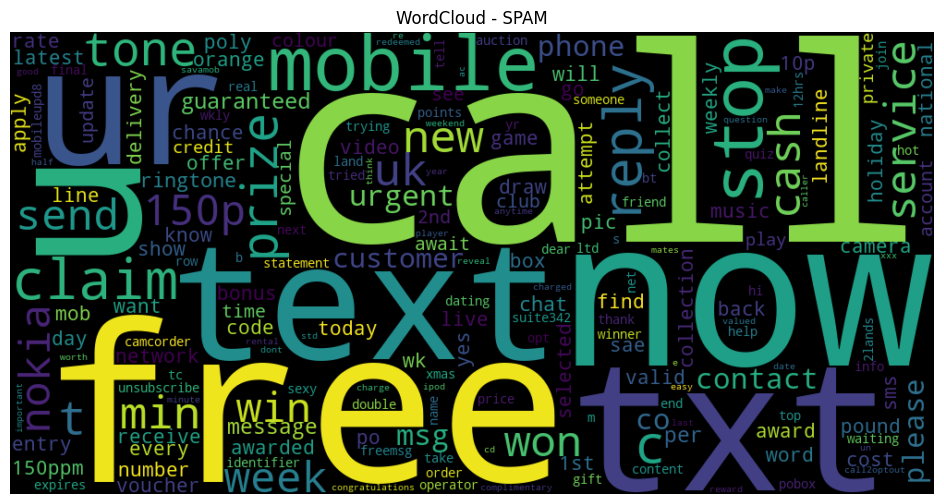

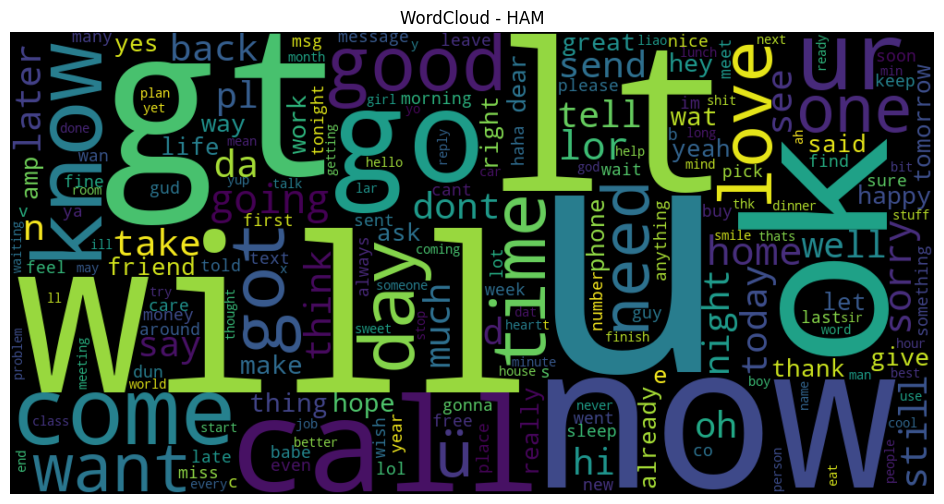

In [130]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def make_wordcloud(text, title):
    wc = WordCloud(
        width=1000,
        height=500,
        background_color="black",
        stopwords=stopwords,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

spam_text = " ".join(df.loc[df["label"] == "spam", "text_clean"].astype(str).tolist())
ham_text  = " ".join(df.loc[df["label"] == "ham",  "text_clean"].astype(str).tolist())

print()
make_wordcloud(spam_text, "WordCloud - SPAM")
make_wordcloud(ham_text, "WordCloud - HAM")

# Wniosek z chmury słów
- SPAM -> zawiera treści podobne do przekazu marketingowego, wskazuje na podjęcie działania \n
- HAM -> zawiera treści brzmiące kolokwialnie i towarzysko